In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
dfx=pd.read_csv("./linearX.csv")
dfy=pd.read_csv("./linearY.csv")

In [22]:
print(dfx.shape)
print(dfy.shape)

(99, 1)
(99, 1)


In [24]:
x=dfx.values
y=dfy.values


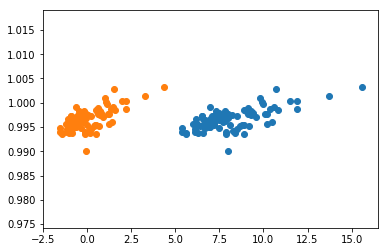

In [26]:
plt.scatter(x,y)
X=(x-x.mean())/x.std()
Y=y
plt.scatter(X,Y)
plt.show()

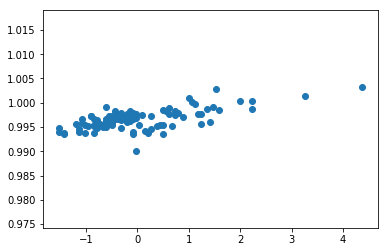

In [27]:
plt.scatter(X,Y)
plt.show()

In [50]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x


def error(X,Y,theta):
    
    m = X.shape[0]
    error = 0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx-Y[i])**2
        
    return error

def gradient(X,Y,theta):
    
    grad = np.zeros((2,))
    m = X.shape[0]

    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] +=  (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i]
        
    return grad
    
#Algorithm
def gradientDescent(X,Y,learning_rate=0.001):
    
    theta = np.array([-2.0,0.0])
    
    itr = 0
    max_itr = 100
    
    error_list = []
    theta_list = []
    
    while(itr<=max_itr):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        itr += 1
        
    
    return theta,error_list,theta_list

    

In [52]:
final_theta, error_list,theta_list = gradientDescent(X,Y)

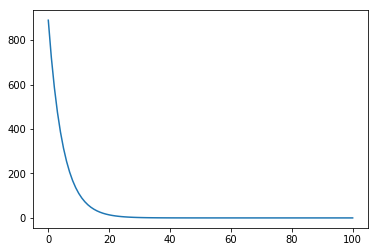

In [53]:
plt.plot(error_list)

In [54]:
print(final_theta)

[0.996554  0.0013579]


In [56]:
x_test=np.linspace(-2,6,10)
print(x_test)

[-2.         -1.11111111 -0.22222222  0.66666667  1.55555556  2.44444444
  3.33333333  4.22222222  5.11111111  6.        ]


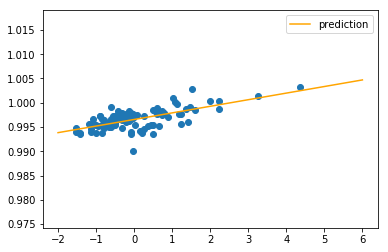

In [60]:
plt.scatter(X,Y)
plt.plot(x_test,hypothesis(x_test,final_theta),color='orange',label='prediction')
plt.legend()
plt.show()
